In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_greece = df[df['job_country']=='Greece']

In [4]:
df_skills = df_greece.explode('job_skills')

In [10]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
704,sql,Data Engineer,316
549,python,Data Engineer,290
703,sql,Data Analyst,247
550,python,Data Scientist,233
175,excel,Data Analyst,193
...,...,...,...
650,sheets,Cloud Engineer,1
211,flow,Senior Data Analyst,1
653,sheets,Machine Learning Engineer,1
655,shell,Business Analyst,1


In [13]:
df_posts = df_greece.groupby('job_title_short').size()
df_posts = df_posts.reset_index(name='job_postings')
df_posts

,job_title_short,job_postings
0,Business Analyst,216
1,Cloud Engineer,39
2,Data Analyst,496
3,Data Engineer,443
4,Data Scientist,317
5,Machine Learning Engineer,116
6,Senior Data Analyst,43
7,Senior Data Engineer,122
8,Senior Data Scientist,68
9,Software Engineer,195


In [17]:
df_skills_perc = pd.merge(df_skills_count, df_posts, how='left', on='job_title_short')
df_skills_perc['skill_perc'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['job_postings']
df_skills_perc

,job_skills,job_title_short,skill_count,job_postings,skill_perc
0,sql,Data Engineer,316,443,71.331828
1,python,Data Engineer,290,443,65.462754
2,sql,Data Analyst,247,496,49.798387
3,python,Data Scientist,233,317,73.501577
4,excel,Data Analyst,193,496,38.911290
...,...,...,...,...,...
835,sheets,Cloud Engineer,1,39,2.564103
836,flow,Senior Data Analyst,1,43,2.325581
837,sheets,Machine Learning Engineer,1,116,0.862069
838,shell,Business Analyst,1,216,0.462963


In [26]:
df_posts.sort_values(by='job_postings', ascending=False, inplace=True)
job_titles = df_posts['job_title_short'].unique().tolist()[:3]


['Data Analyst', 'Data Engineer', 'Data Scientist']

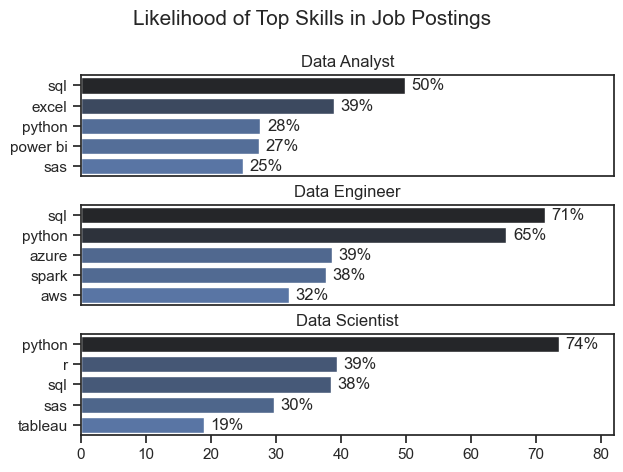

In [57]:
fig, ax = plt.subplots(3,1)
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc.job_title_short == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_perc', y='job_skills', hue='skill_count', palette='dark:b_r', ax=ax[i])
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,82)

    for n,v in enumerate(df_plot['skill_perc']):
        ax[i].text(v+1, n, f'{v:.0f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Top Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()